# Introduction
*A very very very brief introduction into the world of plotting data from ROS*

## Data Acquisition

The data used in this sample notebook is derived from a simple gtest found in `src/husky_test/test/common.test`

In [1]:
! cat ../test/common.test

<?xml version="1.0"?>

<launch>

  <include file="$(find husky_test)/launch/common.launch" />

  <test test-name="common_spawn_test"
        pkg="husky_test"
        type="common_test"
        required="true"
        time-limit="20">
  </test>

  <node pkg="rosbag"
        type="record"
        name="rosbag_record_standard_data"
        respawn="true"
        output="screen"
        args="-O $(find husky_test)/data/imu /imu/data"> <!-- [-O DATA_NAME TOPICS_TO_RECORD] -->
  </node>

</launch>


In the ROS executable test file shown above, `common.launch` is first executed, which launches the Husky robot in an empty Gazebo world. Then, the test titled "common_test" is launched (along with a rosbag record). The test node was created using the GTest suite and verifies that the husky's linear x acceleration is less than zero. The rosbag then captures the data from the `/imu/data` topic, which is used in post-processing.

### Creating the CSV File

To create a CSV file from the captured bag file, run the script `convert_all_bags.py` found in the `analysis_tools` folder of `husky_test` which iterates through the `data` folder and converts all the .bag files to .csv.

### Creating the Plots

Now, we can create plots to visualize the data from our csv file.

In [2]:
%matplotlib inline

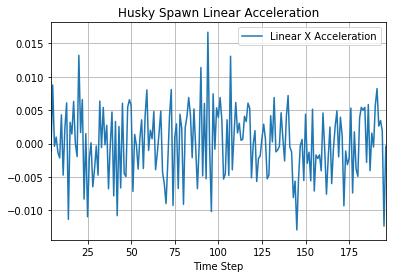

In [3]:
''' 
Sample plot using the matplotlib library
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('imu.csv', dtype={1:np.float64,14:np.float64}, usecols=[1, 14])
data.columns = ['Time Step', 'Linear X Acceleration']
data.plot(title='Husky Spawn Linear Acceleration', x='Time Step', y='Linear X Acceleration', grid=True, kind='line')
plt.show()

In [4]:
print(data['Linear X Acceleration'].mean(), ' m/s')

0.000125161001324016  m/s


As shown above, the husky's linear x acceleration during the test was approximately zero.